<a href="https://colab.research.google.com/github/CodingCat-Jung/SmartCity/blob/main/SmartCity02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,426 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123630 files and dire

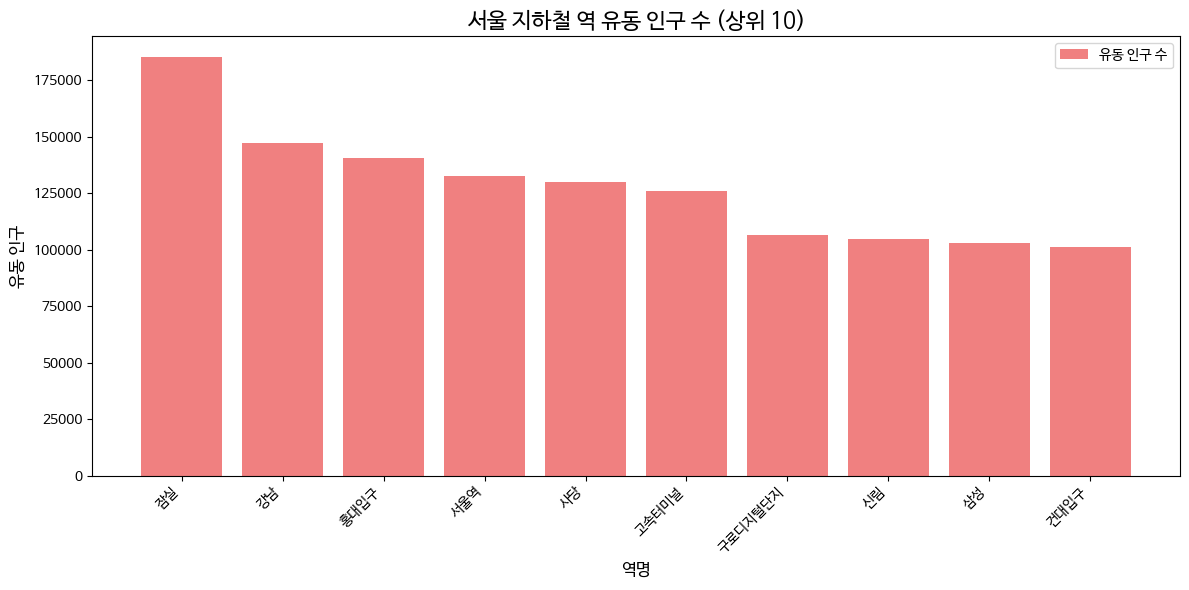

In [5]:
# 지하철역 승하차 순위 파악하기
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 서울교통공사_승하차순위_20231231.csv 파일 불러오기
df = pd.read_csv('서울교통공사_승하차순위_20231231.csv', encoding='cp949')
# df.head()

# 각 지하철 역별 승하차 계산
station_groups = df.groupby('역명')['일평균승하차인원'].sum().reset_index()

# 전체 승하차 인원 계산
total_floating_population = df['일평균승하차인원'].sum()

# 결과를 새로운 데이터프레임으로 저장
station_groups_df = station_groups

# 유동 인구 수 기준으로 정렬
df_sorted = station_groups_df.sort_values(by='일평균승하차인원', ascending=False)

# 결과를 새로운 CSV 파일로 저장
output_file = '지하철 역 유동인구 순위.csv'
df_sorted.to_csv(output_file, index=False, encoding='utf-8-sig')


plt.rc('font', family='NanumBarunGothic')

# 상위 10개 지하철역 추출
df_top10 = df_sorted.head(10)

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(df_top10['역명'], df_top10['일평균승하차인원'], color='lightcoral', label='유동 인구 수')

# 그래프 제목 및 레이블 설정
plt.title('서울 지하철 역 유동 인구 수 (상위 10)', fontsize=16)
plt.xlabel('역명', fontsize=12)
plt.ylabel('유동 인구', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()

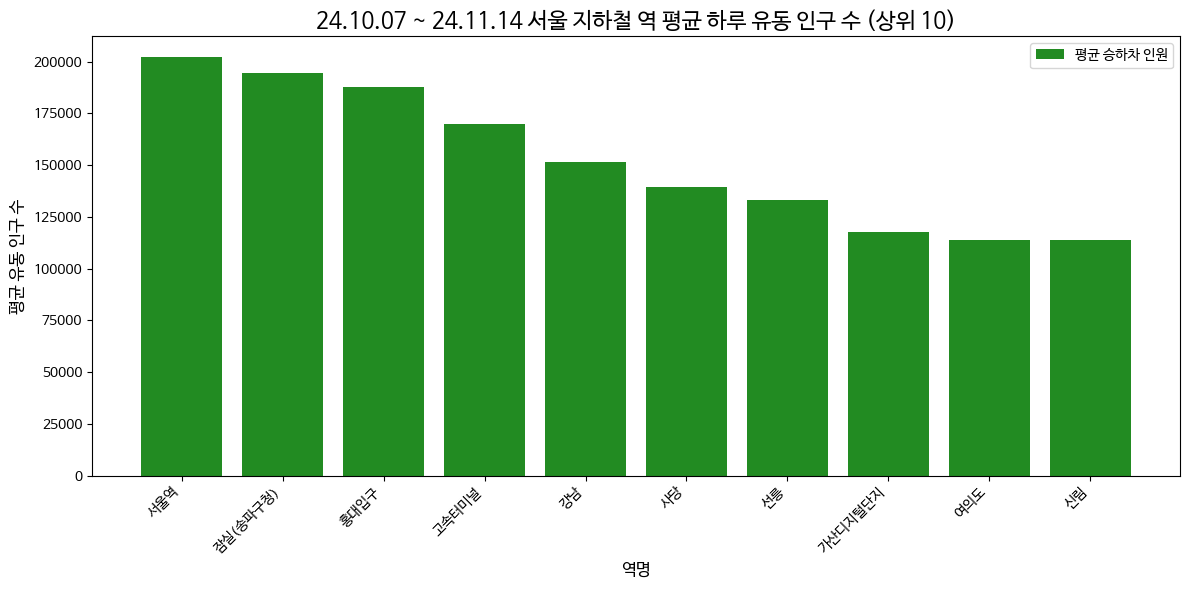

In [32]:
# 지하철역 승하차 순위 파악하기 2 - 24.11.14 ~ 24.10.07
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 데이터 불러오기
df = pd.read_csv('서울시 지하철호선별 역별 승하차 인원 정보.csv', encoding='cp949')

# 승차와 하차 인원 합산 (하루 총 승하차 인원)
df['하루 총 승하차인원'] = df['승차총승객수'] + df['하차총승객수']

# 각 역명에 대해 사용일자 카운트 및 총 승하차 인원 합산
station_stats = (
    df.groupby('역명')
    .agg(
        총승하차인원=('하루 총 승하차인원', 'sum'),
        사용일자수=('사용일자', 'nunique')
    )
    .reset_index()
)

# 평균 하루 총 승하차 인원 계산
station_stats['평균 하루 총 승하차인원'] = station_stats['총승하차인원'] / station_stats['사용일자수']

station_stats['평균 하루 총 승하차인원'] = station_stats['평균 하루 총 승하차인원'].round() # 평균 값 반올림

# 평균 승하차 인원 기준으로 정렬
df_sorted = station_stats.sort_values(by='평균 하루 총 승하차인원', ascending=False)

# 결과를 새로운 CSV 파일로 저장
output_file = '24.10.07 ~ 24.11.14 지하철 역별 평균 유동인구 순위(사용일자 기준).csv'
df_sorted.to_csv(output_file, index=False, encoding='utf-8-sig')

# 상위 10개 역 추출
df_top10 = df_sorted.head(10)

plt.rc('font', family='NanumBarunGothic')

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(df_top10['역명'], df_top10['평균 하루 총 승하차인원'], color='forestgreen', label='평균 승하차 인원')

# 그래프 제목 및 레이블 설정
plt.title('24.10.07 ~ 24.11.14 서울 지하철 역 평균 하루 유동 인구 수 (상위 10)', fontsize=16)
plt.xlabel('역명', fontsize=12)
plt.ylabel('평균 유동 인구 수', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()


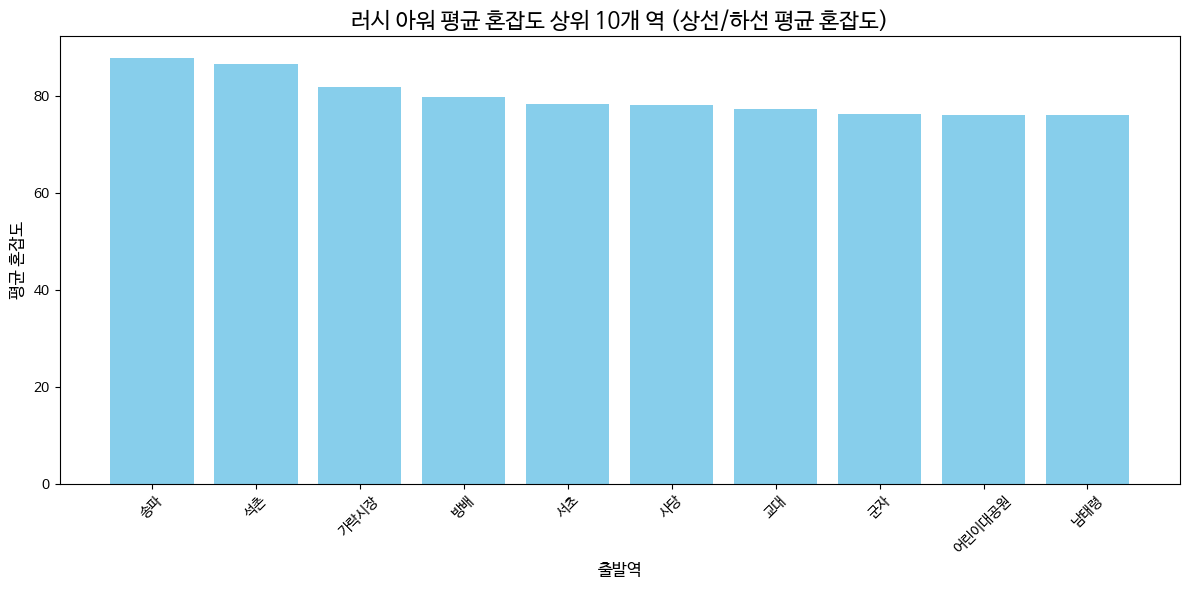

In [30]:
# 러시 아워 (출퇴근 시간대 혼잡도 파악) 오전 7~9시 / 오후 6~8시
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 데이터 불러오기
df = pd.read_csv('서울교통공사_지하철혼잡도정보_20240930.csv', encoding='cp949')

# 러시 아워 시간대 열 선택 (오전 7~9시, 오후 6~8시)
rush_hour_columns = ['7시00분', '7시30분', '8시00분', '8시30분',
                     '18시00분', '18시30분', '19시00분', '19시30분']

# 러시 아워 평균 혼잡도 계산
df['러시아워_평균'] = df[rush_hour_columns].mean(axis=1)

# 동일한 출발역 기준으로 상선/하선 데이터를 평균 처리
df_grouped = (
    df.groupby(['요일구분', '호선', '역번호', '출발역'])['러시아워_평균']
    .mean()
    .reset_index()
)

# 러시아워 평균이 높은 순으로 정렬
df_grouped_sorted = df_grouped.sort_values(by='러시아워_평균', ascending=False)

# 결과를 새로운 CSV 파일로 저장
output_file = '요일별_러시아워_지하철혼잡도_상하평균.csv'
df_grouped_sorted.to_csv(output_file, index=False, encoding='utf-8-sig')

# 평일 데이터에서 상위 10개 역 추출 및 시각화
top_10_weekday = (
    df_grouped_sorted[df_grouped_sorted['요일구분'] == '평일']
    .sort_values(by='러시아워_평균', ascending=False)
    .head(10)
)

# 시각화를 위한 준비
plt.figure(figsize=(12, 6))
plt.bar(top_10_weekday['출발역'], top_10_weekday['러시아워_평균'], color='skyblue')
plt.title('러시 아워 평균 혼잡도 상위 10개 역 (상선/하선 평균 혼잡도)', fontsize=16)
plt.xlabel('출발역', fontsize=12)
plt.ylabel('평균 혼잡도', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

# 시각화
plt.show()


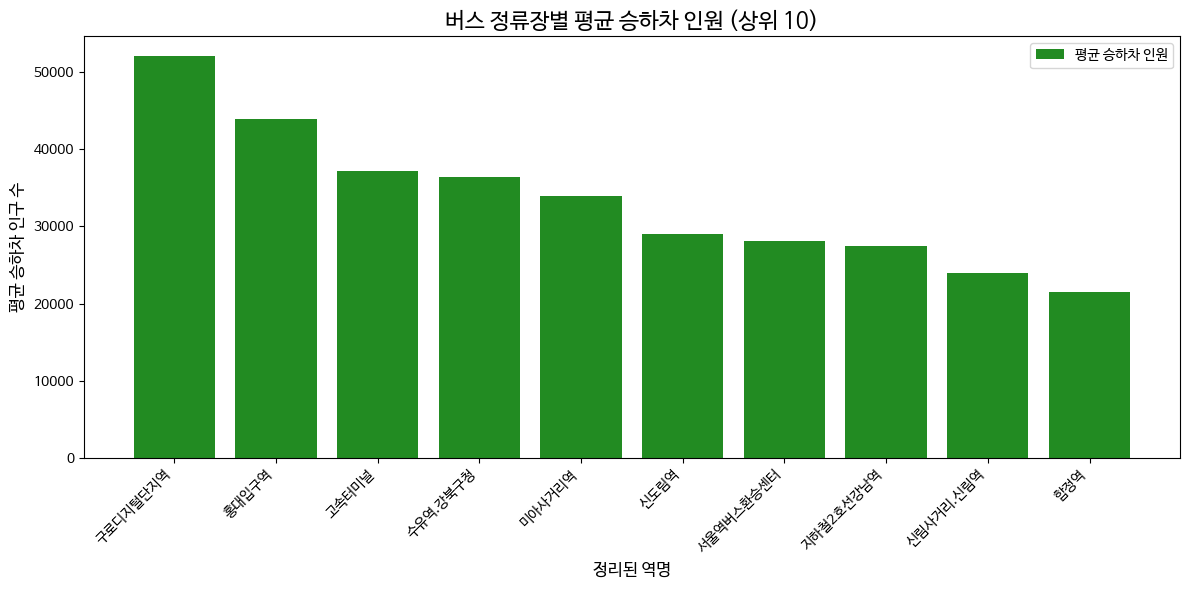

In [44]:
# 버스 정류장별 최다 승하차 이용 수 파악하기
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 데이터 불러오기
df = pd.read_csv('서울시 버스노선별 정류장별 승하차 인원 정보.csv', encoding='cp949')

# 괄호 안의 값을 제거한 새로운 '정리된 역명' 컬럼 생성
df['정리된 역명'] = df['역명'].str.replace(r'\(.*\)', '', regex=True).str.strip()

# 승차와 하차 인원 합산 (하루 총 승하차 인원)
df['하루 총 승하차인원'] = df['승차총승객수'] + df['하차총승객수']

# 정리된 역명을 기준으로 그룹화하여 사용일자 카운트 및 총 승하차 인원 합산
station_stats = (
    df.groupby(['정리된 역명'])  # 정리된 역명 사용
    .agg(
        총승하차인원=('하루 총 승하차인원', 'sum'),
        사용일자수=('사용일자', 'nunique')
    )
    .reset_index()
)

# 평균 하루 총 승하차 인원 계산
station_stats['평균 하루 총 승하차인원'] = station_stats['총승하차인원'] / station_stats['사용일자수']
station_stats['평균 하루 총 승하차인원'] = station_stats['평균 하루 총 승하차인원'].round()  # 평균 값 반올림

# 평균 승하차 인원 기준으로 정렬
df_sorted = station_stats.sort_values(by='평균 하루 총 승하차인원', ascending=False)

# 결과를 새로운 CSV 파일로 저장
output_file = '버스 정류장별 승하차 인원 분석 결과.csv'
df_sorted.to_csv(output_file, index=False, encoding='utf-8-sig')

# 상위 10개 정류장 추출
df_top10 = df_sorted.head(10)

plt.rc('font', family='NanumBarunGothic')

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(df_top10['정리된 역명'], df_top10['평균 하루 총 승하차인원'], color='forestgreen', label='평균 승하차 인원')

# 그래프 제목 및 레이블 설정
plt.title('버스 정류장별 평균 승하차 인원 (상위 10)', fontsize=16)
plt.xlabel('정리된 역명', fontsize=12)
plt.ylabel('평균 승하차 인구 수', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()

